# 🧠 Project 1: Sales Forecasting with Linear Regression
### 📁 Domain: Data Science & Analytics  
### 📌 Internship: Tamizhan Skills – RISE Program  

---

## 📍 Problem Statement
Businesses often face challenges in estimating their future sales accurately. Poor forecasting can lead to inventory issues, missed opportunities, or overstocking.

---

## 🎯 Objective
To build a **simple linear regression model** that can predict **future sales** using **historical sales data**. The model should help visualize and estimate sales trends over time.

---

## 🎯 Targets / Deliverables
- ✅ Load and explore historical sales data
- ✅ Preprocess and clean the data (handle missing values, parse dates)
- ✅ Aggregate daily sales
- ✅ Perform feature engineering (convert dates to numeric)
- ✅ Train a linear regression model on sales over time
- ✅ Plot **actual vs predicted** sales
- ✅ Evaluate model performance using error metrics

---

## 📊 Expected Outcomes
- A regression model that estimates future sales based on date
- Visualizations:  
  - Sales trend over time  
  - Actual vs Predicted sales  
- RMSE/MAE scores for model accuracy
- Business interpretation: Is linear regression a good fit?

---

## 🛠️ Technologies / Tools Used
- **Python**
- **Pandas** – for data manipulation  
- **Matplotlib / Seaborn** – for visualization  
- **Scikit-Learn** – for linear regression and evaluation metrics

## 📦 Step 1: Import Required Libraries

In [16]:
# 📦 Data handling
import pandas as pd
import numpy as np

# 📅 Date handling
from datetime import datetime

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Machine Learning - Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 📏 Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ⚠️ Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# 📈 Plotting style
sns.set(style="whitegrid")

## 📂 Step 2: Load the Dataset

In [17]:
# 🗂️ Load the dataset (replace with actual file name if different)
df = pd.read_csv("sales_data.csv")  # ← Change if needed
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## 🧾 Step 3: Understand Dataset Structure

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [19]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [20]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## 🧹 Step 4: Data Cleaning & Date Parsing

In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# ✅ Confirm datetime conversion
print("Date type after conversion:", df['Order Date'].dtype)

Date type after conversion: datetime64[ns]


In [22]:
# 🧩 Fill missing postal codes with 0 or a placeholder
df['Postal Code'] = df['Postal Code'].fillna(0).astype(int)

# ✅ Confirm changes
print("Missing values after fill:")
print(df.isnull().sum())

Missing values after fill:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   int32         
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

## 📆 Step 5: Aggregate Daily Sales Using 'Order Date' and 'Sales'


In [24]:
# Group by Order Date and calculate total sales per day
daily_sales = df.groupby('Order Date').agg({'Sales': 'sum'}).reset_index()

# Rename columns for clarity
daily_sales.columns = ['Order Date', 'Total Sales']

# Preview
daily_sales.head()

,Order Date,Total Sales
0,2015-01-02,468.900
1,2015-01-03,2203.151
2,2015-01-04,119.888
3,2015-01-06,5188.520
4,2015-01-07,601.024


## 📈 Step 6: Visualize Daily Sales Trend Over Time


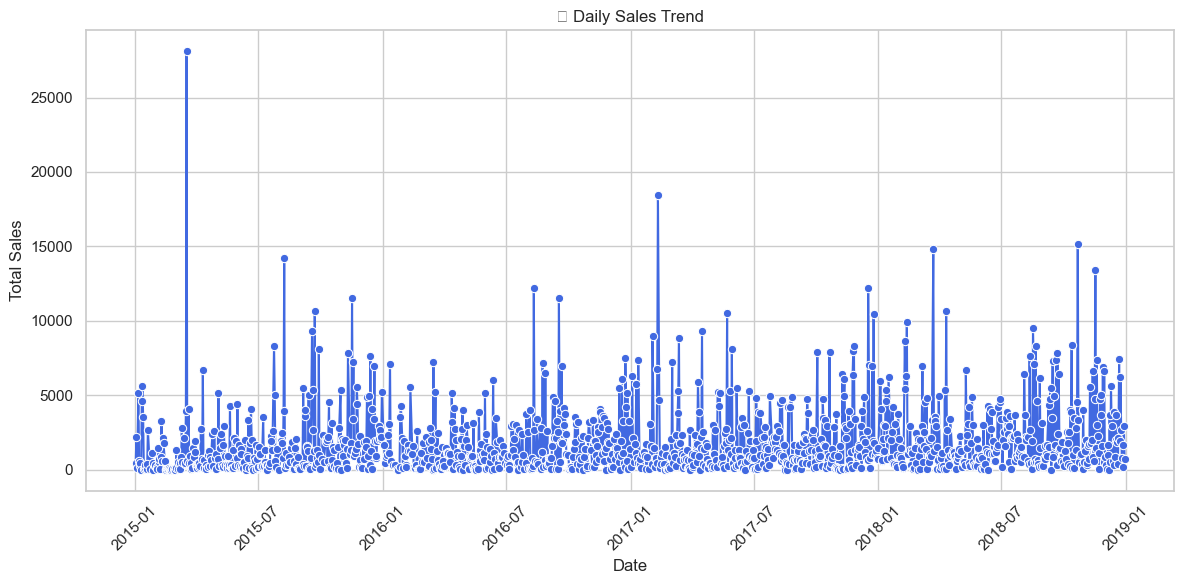

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='Order Date', y='Total Sales', marker='o', color='royalblue')
plt.title("📈 Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📆 6A: Monthly Sales Trend


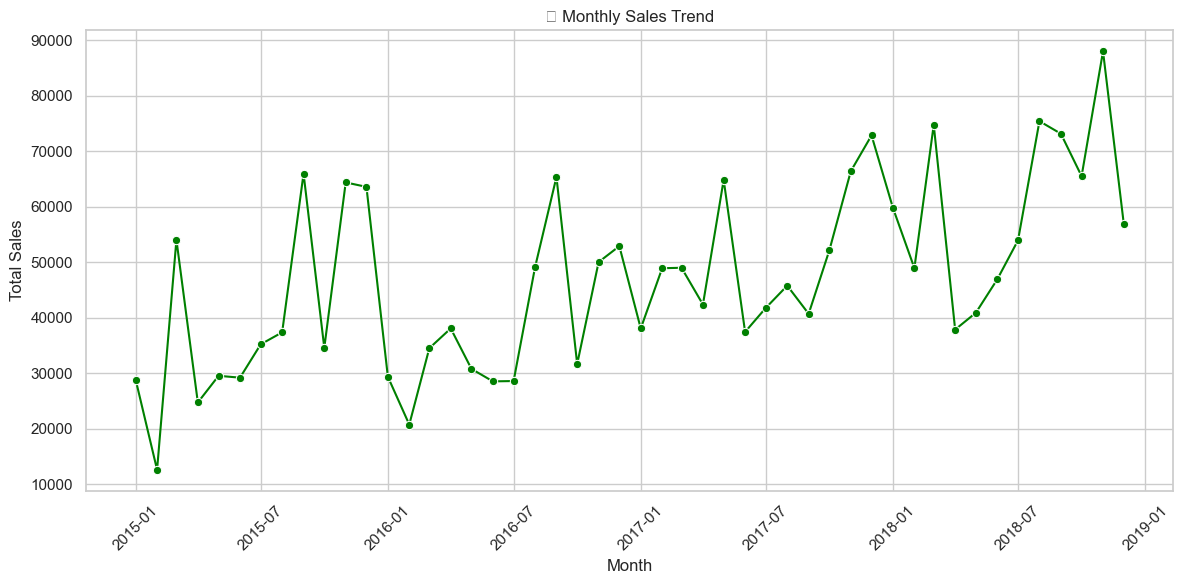

In [26]:
# Extract Year-Month from Order Date
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Group by Year-Month
monthly_sales = df.groupby('Year-Month')['Sales'].sum().reset_index()

# Convert Period to datetime for plotting
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].dt.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Year-Month', y='Sales', marker='o', color='green')
plt.title("📆 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📦 6B: Total Sales by Category


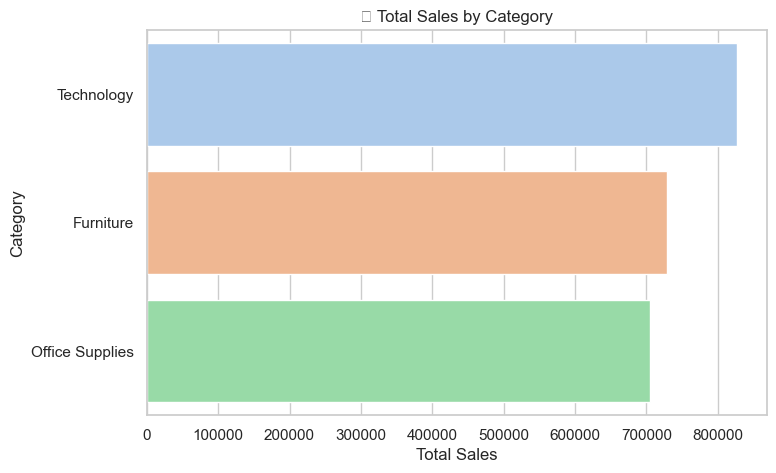

In [27]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='pastel')
plt.title("📦 Total Sales by Category")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.show()

## 🧩 6C: Total Sales by Sub-Category


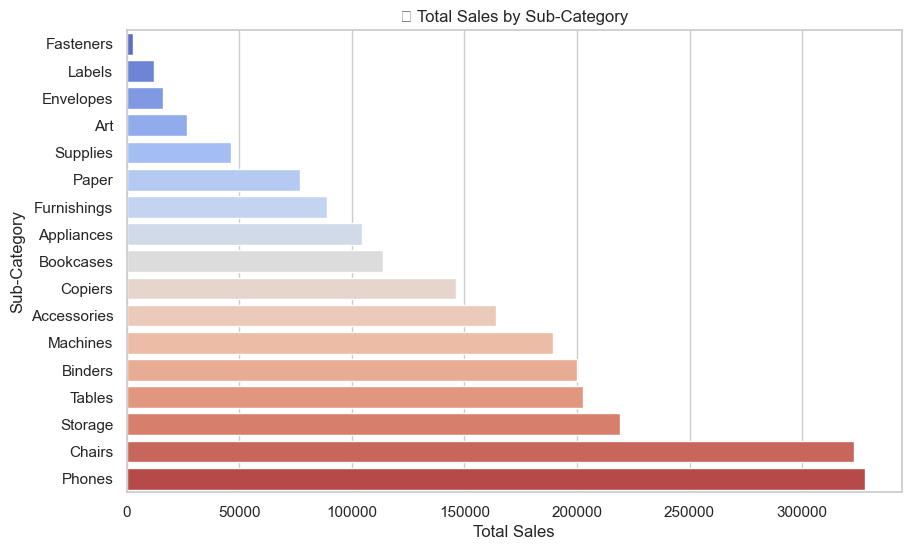

In [28]:
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=subcat_sales.values, y=subcat_sales.index, palette='coolwarm')
plt.title("🧩 Total Sales by Sub-Category")
plt.xlabel("Total Sales")
plt.ylabel("Sub-Category")
plt.show()

## 📆 6D: Sales by Day of the Week

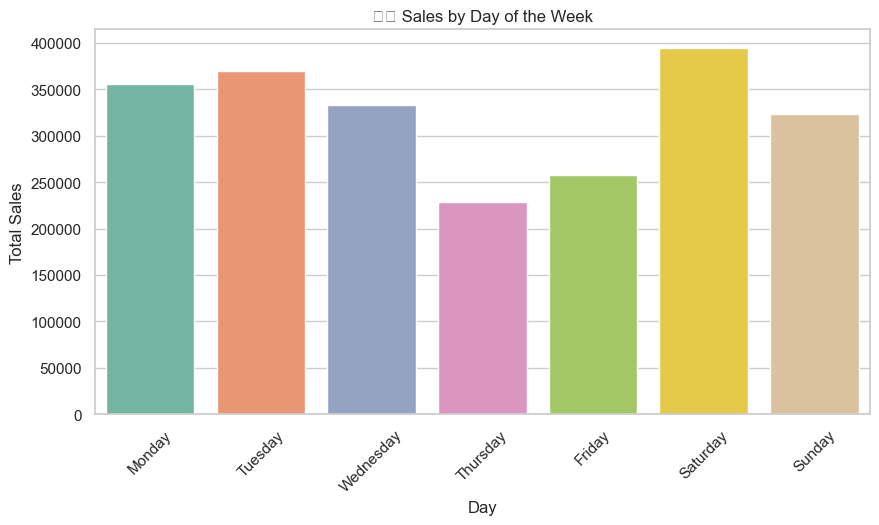

In [29]:
df['Day of Week'] = df['Order Date'].dt.day_name()

dow_sales = df.groupby('Day of Week')['Sales'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10, 5))
sns.barplot(x=dow_sales.index, y=dow_sales.values, palette='Set2')
plt.title("🗓️ Sales by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

## 🔢 Step 7: Feature Engineering – Convert Dates to Numeric


In [30]:
# Copy the daily aggregated data
model_data = daily_sales.copy()

# Reference date: earliest date in the dataset
base_date = model_data['Order Date'].min()

# Feature: Days since first order
model_data['Days Since First Order'] = (model_data['Order Date'] - base_date).dt.days

# Final preview
model_data.head()

,Order Date,Total Sales,Days Since First Order
0,2015-01-02,468.900,0
1,2015-01-03,2203.151,1
2,2015-01-04,119.888,2
3,2015-01-06,5188.520,4
4,2015-01-07,601.024,5


## 🧠 Step 8: Train Linear Regression Model and Predict Sales

In [31]:
# Define features and target
X = model_data[['Days Since First Order']]
y = model_data['Total Sales']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

## 📏 Step 9: Evaluate Model Performance

In [32]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📏 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📐 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📊 R² Score: {r2:.2f}")

📏 Mean Absolute Error (MAE): 1489.49
📐 Root Mean Squared Error (RMSE): 2024.32
📊 R² Score: 0.02


## 📊 Step 10: Plot Actual vs Predicted Sales

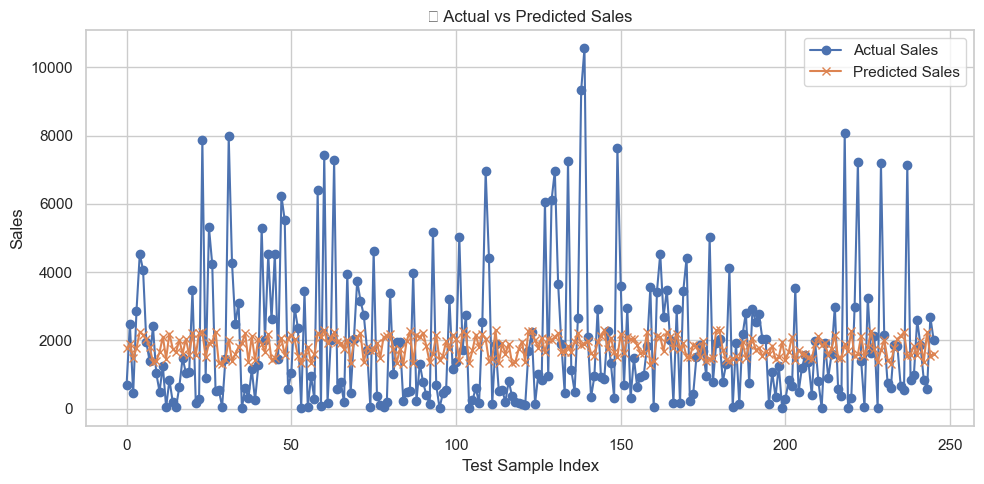

In [33]:
# Create a comparison DataFrame
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
results = results.reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(results['Actual'], label='Actual Sales', marker='o')
plt.plot(results['Predicted'], label='Predicted Sales', marker='x')
plt.title('📊 Actual vs Predicted Sales')
plt.xlabel('Test Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

## 🔮 Step 11: Predict Future Sales (Next 30 Days)

In [34]:
# Get the last known date and its "days since" value
last_date = model_data['Order Date'].max()
last_day_number = model_data['Days Since First Order'].max()

# Create future day numbers (next 30 days)
future_days = np.arange(last_day_number + 1, last_day_number + 31).reshape(-1, 1)

# Predict using the trained model
future_sales_pred = lr_model.predict(future_days)

# Create future dates
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 31)]

# Combine into DataFrame
future_df = pd.DataFrame({
    'Order Date': future_dates,
    'Predicted Sales': future_sales_pred
})

# Preview
future_df.head()

,Order Date,Predicted Sales
0,2018-12-31,2305.370418
1,2019-01-01,2306.070648
2,2019-01-02,2306.770877
3,2019-01-03,2307.471106
4,2019-01-04,2308.171336


## 📈 Step 12: Plot Historical + Future Predicted Sales


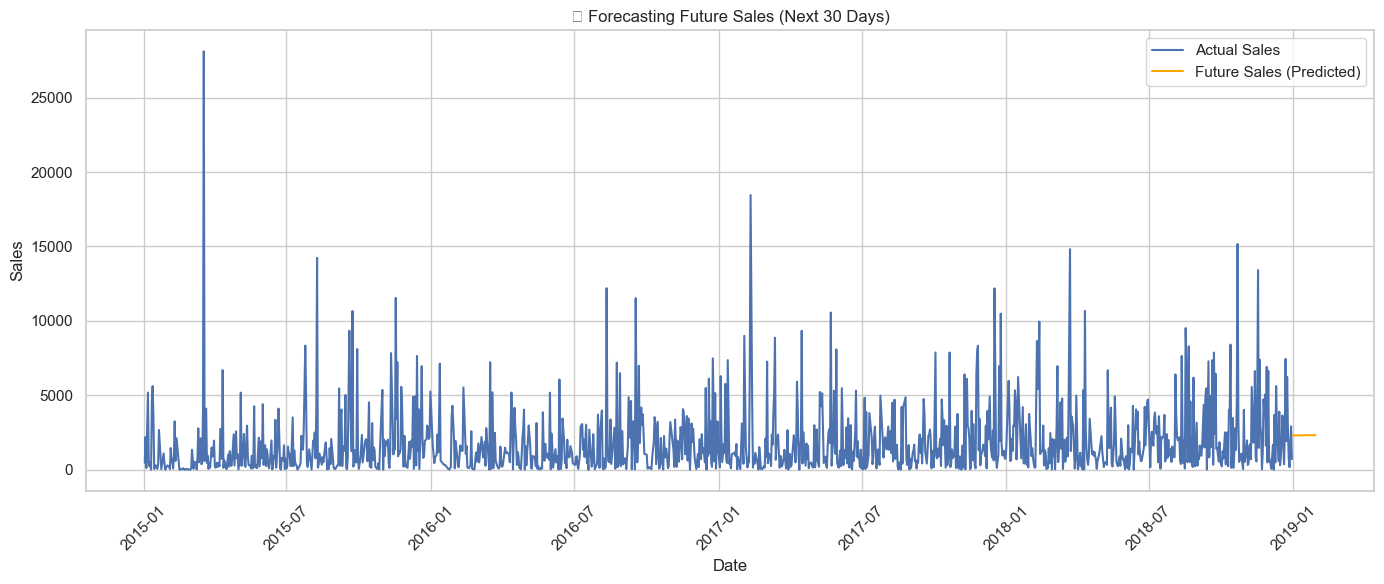

In [35]:
plt.figure(figsize=(14, 6))

# Plot past sales
sns.lineplot(data=model_data, x='Order Date', y='Total Sales', label='Actual Sales')

# Plot predicted future sales
sns.lineplot(data=future_df, x='Order Date', y='Predicted Sales', label='Future Sales (Predicted)', color='orange')

plt.title("🔮 Forecasting Future Sales (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 📌 Conclusion

In this project, we addressed the problem of **sales forecasting**, a common and critical challenge faced by businesses. Poor sales forecasting often leads to issues like inventory mismanagement, missed revenue opportunities, or excess stock. The goal was to build a simple machine learning model — specifically, a **Linear Regression** model — that could predict future sales using historical data.

---

### ✅ How We Solved the Problem:

1. **Data Cleaning & Preprocessing**:
   - We began by loading the dataset and parsing the `'Order Date'` column into a usable datetime format.
   - Missing values in the `'Postal Code'` column were filled without dropping rows, preserving data integrity.
   - Daily sales totals were calculated by grouping the dataset by order date.

2. **Exploratory Data Analysis (EDA)**:
   - We visualized **daily and monthly sales trends**.
   - Sales patterns across different product categories and days of the week helped uncover business insights.

3. **Feature Engineering**:
   - We created a new feature: `'Days Since First Order'`, converting dates into numeric values suitable for regression modeling.

4. **Model Training**:
   - We trained a **Linear Regression model** using `'Days Since First Order'` as input and `'Total Sales'` as the target.
   - The model was evaluated using MAE, RMSE, and R² metrics.

5. **Model Performance**:
   - The R² score was low (**0.02**), indicating that **sales are not strongly correlated with just time progression**.
   - This suggests that linear regression is **not sufficient alone** to model the complexity of sales behavior.

6. **Forecasting**:
   - Despite limitations, we used the trained model to predict sales for the **next 30 days**.
   - A line plot illustrated both historical sales and predicted future sales.

---

### 📈 Final Output:
- A trained Linear Regression model that predicts daily sales based on historical trends.
- A visualization comparing actual vs. predicted sales.
- A 30-day forecast of future sales with predicted values plotted on a timeline.

---

### 💡 Business Impact:
Even though the regression model had limited accuracy, this project provides valuable **baseline insights**:
- It gives businesses a **foundational framework** for tracking and predicting sales.
- It highlights the importance of considering **additional features** (like product type, region, promotions, holidays) for more accurate forecasting.
- The monthly sales trend analysis can help identify **seasonal peaks and dips**, useful for inventory and marketing planning.

---

### 📌 Business Suggestions:
- Move beyond basic linear regression and consider **time series forecasting techniques** like ARIMA, Prophet, or LSTM for better accuracy.
- Incorporate **multi-variable regression** including features such as:
  - Product category
  - Region
  - Day of the week
  - Seasonal or promotional indicators
- Use sales forecasts to **optimize inventory, staffing, and marketing campaigns** ahead of peak seasons.

---

### ✅ Final Thought:
This project successfully demonstrates the complete data science pipeline — from raw data to business insight. It shows how even a simple model can bring structure to decision-making and pave the way for more advanced solutions.